In [15]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from matplotlib import animation

In [20]:
#parameters
n_agents = 10

a = 0.5
#tau = 2

#initial conditions
init_x = np.random.random(n_agents)*40
init_y = np.random.random(n_agents)*10

init_v_x = []
init_v_y = [0]*n_agents

for x in init_x:
    if x<20.0:
        init_v_x.append(1.0)
    else:
        init_v_x.append(-1.0)
    
Z0 = []

for i in range(n_agents):      
        Z0.append(init_x[i])
        Z0.append(init_y[i])
        Z0.append(init_v_x[i])
        Z0.append(init_v_y[i])

#desired_v_x = init_v_x
#desired_v_y = init_v_y
    
dx = np.zeros(n_agents)
dy = np.zeros(n_agents)
dv_x = np.zeros(n_agents)
dv_y = np.zeros(n_agents)   

x = []
y = []
v_x = []      
v_y = [] 
output = []
    
def swarmingmodel(t,Z):
    
    dx.fill(0.0)
    dy.fill(0.0)
    dv_x.fill(0.0)
    dv_y.fill(0.0)
      
    x.clear()
    y.clear()
    v_x.clear()
    v_y.clear()
    
    for i in range(n_agents):      #unpack states  
        x.append(Z[4*i])
        y.append(Z[4*i+1])
        v_x.append(Z[4*i+2])
        v_y.append(Z[4*i+3])

    for i in range(n_agents):

        dx[i] += v_x[i]  
        dy[i] += v_y[i]
    #    dv_x[i] += (1/tau)*(desired_v_x[i] - v_x[i])   
     #   dv_y[i] += (1/tau)*(desired_v_y[i] - v_y[i]) 
            
        for j in range(n_agents):
            if i != j:
                r = (x[i] - x[j])**2 + (y[i] - y[j])**2
                dv_x[i] -= (x[i] - x[j])*r**(a/2 - 1)  #attraction-replusion term
                dv_y[i] -= (y[i] - y[j])*r**(a/2 - 1)   # Morse potential
                                                                                                                            
    output.clear()
    for i in range(n_agents):
        output.append(dx[i])
        output.append(dy[i])
        output.append(dv_x[i])
        output.append(dv_y[i])
      
    return tuple(output)

In [21]:
t = np.linspace(0,60,150)
sol = solve_ivp(swarmingmodel,[t[0],t[-1]],Z0, method = 'RK45',t_eval = t)

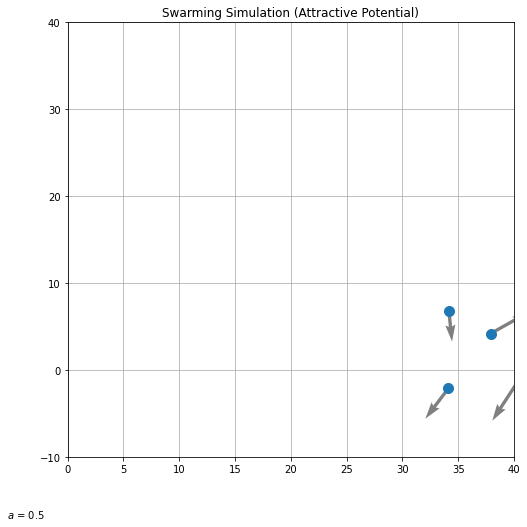

In [23]:
def animate(i):

    ln1.set_data([sol.y[4*k][i] for k in range(n_agents)],[sol.y[4*k+1][i] for k in range(n_agents)] )
    qr.set_offsets([[sol.y[4*k][i] , sol.y[4*k+1][i]] for k in range(n_agents)])
    qr.set_UVC([sol.y[4*k+2][i] for k in range(n_agents)],[sol.y[4*k+3][i] for k in range(n_agents)])
    
fig, ax = plt.subplots(1,1, figsize = (8,8))
ax.grid()

qr = ax.quiver([[sol.y[4*k][0] for k in range(n_agents)]],[sol.y[4*k+1][0] for k in range(n_agents)],[sol.y[4*k+2][0] for k in range(n_agents)],[sol.y[4*k+3][0] for k in range(n_agents)],color='grey')
ln1, = plt.plot([],[],'o',lw = 3, markersize = 10)

plt.title("Swarming Simulation (Attractive Potential)")
plt.figtext(.02, .02, "$a$ = "+ str(round(a,3))) #+ ", τ = " + str(round(tau,3))

ax.set_xlim(0,40)
ax.set_ylim(-10,40) #x,y lims

ani = animation.FuncAnimation(fig,animate,frames = len(sol.y[0]),interval = 20)
ani.save('swarming_simulation_attractive_potential.gif', writer = 'pillow',fps =15)  #saves as gif
